# Lending Club Case Study

In [172]:
# required imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# read the csv file

df = pd.read_csv('loan.csv')
df.head()

/var/folders/89/g2cpp63d2v37z9q3vddwww6h0000gn/T/ipykernel_20687/1717094357.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [174]:
# get the info of the dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [175]:
# get the sum of null values in columns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [176]:
# quite a few columns have null values > 95 % values as null
missing_cols = df.columns[100*(df.isnull().sum()/len(df)) > 95]
missing_cols.size

55

In [177]:
# drop the 55 columns 
loan = df.drop(missing_cols, axis=1)
loan.shape

(39717, 56)

In [178]:
# details of the remaining columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [179]:
# int_rate is object because of % sign, remove % and convert dtype to float
loan.int_rate.values
loan.int_rate =  loan.int_rate.apply(lambda x: float(x[:-1]))



In [180]:
# emp_length is object due to > sign and years 
loan.emp_length.values

array(['10+ years', '< 1 year', '10+ years', ..., '< 1 year', '< 1 year',
       '< 1 year'], dtype=object)

In [181]:
# make emp_length as numeric col, use reg ex to remove everything from value except numbers
# to use reg ex, remove null values of emp_length

loan = loan[~loan.emp_length.isnull()]

import re
loan.emp_length = loan.emp_length.apply(lambda x: re.findall('\d+', str(x))[0])

#convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))
loan.shape

(38642, 56)

In [182]:
# create derived columns: issue_month, issue_year, based on issue_d which has month and year

loan['issue_month'] = loan.issue_d.apply(lambda x: x[:3])
loan['issue_year'] = loan.issue_d.apply(lambda x: int('20' + x[4:]))
loan.issue_month = loan.issue_month.astype(str)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011


## Analysis of variables

A few variables chosen for Analysis:
1. Loan Attributes
    1. loan_status
    2. loan_amnt
    3. int_rate
    4. issue_month, issue_year
    5. verification_status
2. Consumer Attributes
    1. grade
    2. emp_length
    3. home_ownership
    4. purpose

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64


<Axes: xlabel='loan_status', ylabel='count'>

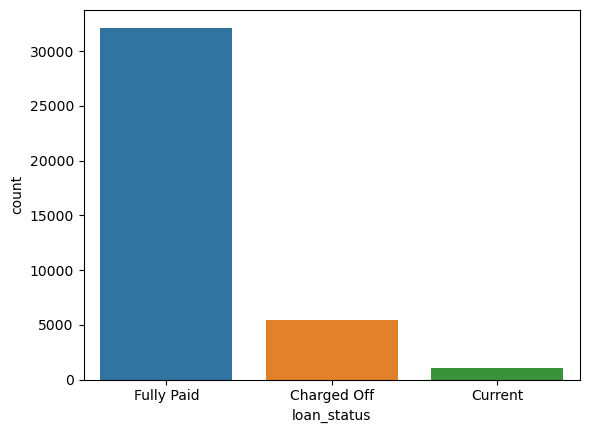

In [183]:
print(loan.loan_status.value_counts())
sns.countplot(x='loan_status', data=loan)

### We are not interested in the current loan accounts, only the historic ones that have either been paid or defaulted. We can now view the selected variables in comparison with the loan_status: Fully Paid or Charged Off

In [184]:
# craete a new dataset loan_non_current which does not have the Current loan_status

loan_non_current = loan[loan.loan_status.isin(['Fully Paid', 'Charged Off'])]

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      21842.500000
max      35000.000000
Name: loan_amnt, dtype: float64

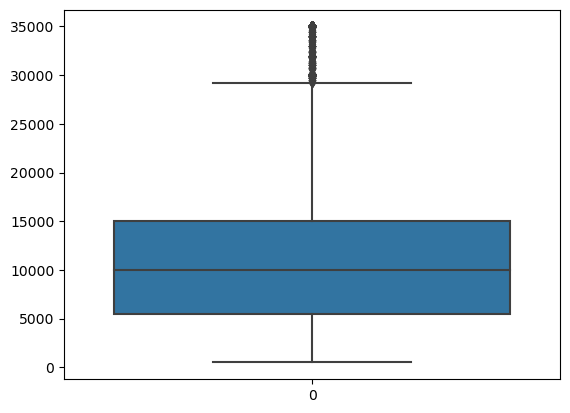

In [185]:
sns.boxplot(loan_non_current.loan_amnt)
loan_non_current.loan_amnt.describe(percentiles=[.1, .25, .5, .75, .9])

### 90% of the loan amounts are between 500 to 21842

/var/folders/89/g2cpp63d2v37z9q3vddwww6h0000gn/T/ipykernel_20687/1174397883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_non_current['loan_amnt_sector'] = pd.cut(loan_non_current.loan_amnt, bins=6,


<Axes: xlabel='loan_amnt_sector', ylabel='count'>

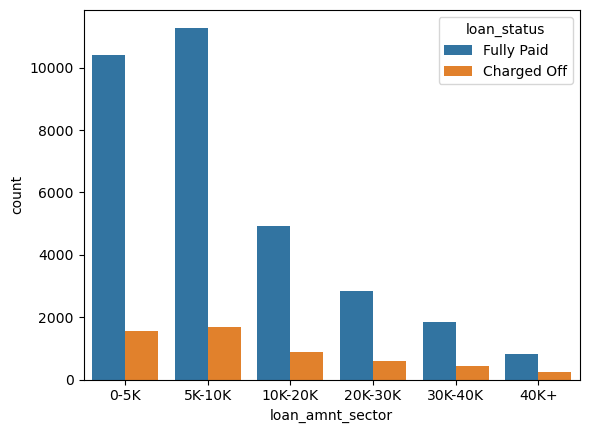

In [186]:
# categorizing loan amount to different sectors with 10K intervals, new column loan_amnt_sector

loan_non_current['loan_amnt_sector'] = pd.cut(loan_non_current.loan_amnt, bins=6, 
                                              labels=['0-5K', '5K-10K','10K-20K','20K-30K','30K-40K', '40K+'])
sns.countplot(x='loan_amnt_sector',  data= loan_non_current, hue=loan_non_current.loan_status)

### Maximum non-current loans are between 5000 to 10000

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
10%          7.140000
25%          8.940000
50%         11.830000
75%         14.420000
90%         16.820000
max         24.400000
Name: int_rate, dtype: float64

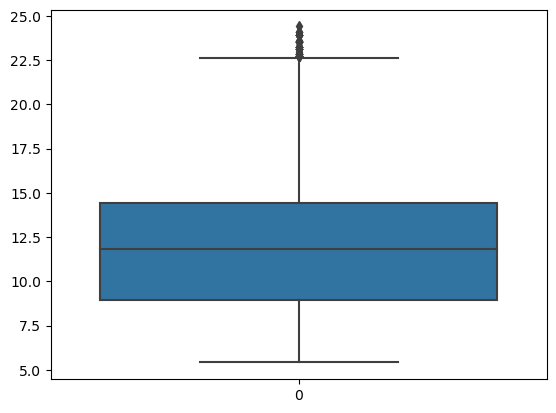

In [187]:
# int_rate
sns.boxplot(loan_non_current.int_rate)
loan_non_current.int_rate.describe(percentiles=[.1, .25, .5, .75, .9])

### 90% of interest rates for the loans range from from 5.4% to 16.8%

/var/folders/89/g2cpp63d2v37z9q3vddwww6h0000gn/T/ipykernel_20687/1976337768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_non_current['loan_int_rate_range'] = pd.cut(loan_non_current.int_rate, bins=6,


<Axes: xlabel='loan_int_rate_range', ylabel='count'>

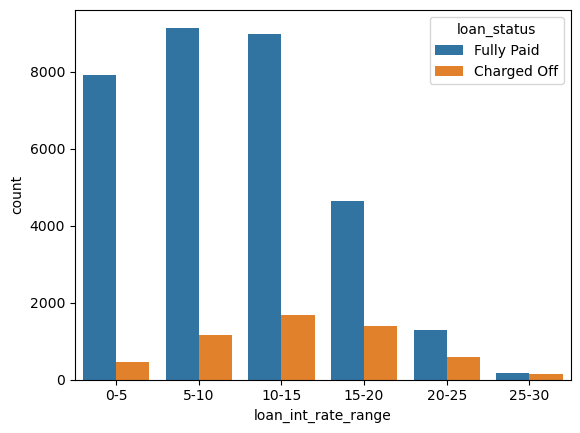

In [188]:
# categorizing int_rate to different ranges with 10K intervals, new column loan_amnt_sector

loan_non_current['loan_int_rate_range'] = pd.cut(loan_non_current.int_rate, bins=6, 
                                              labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
sns.countplot(x='loan_int_rate_range',  data= loan_non_current, hue=loan_non_current.loan_status)


### Maximum loans are given at the rate of 5-10%
### As the interest rates increase, the probability of default is increasing in proportion.
### Loans given with a high interest rate of 25-30% have a high probability of defaulting hence are very risky.

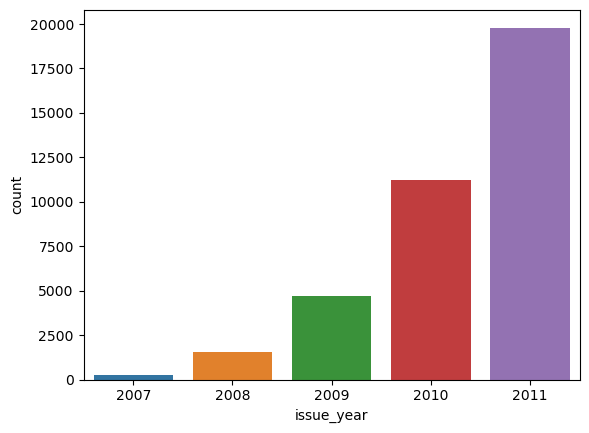

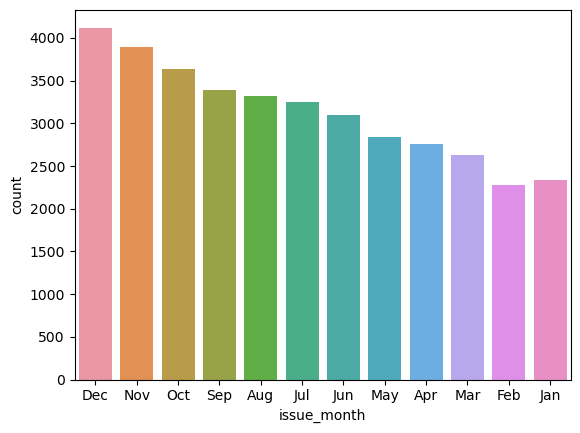

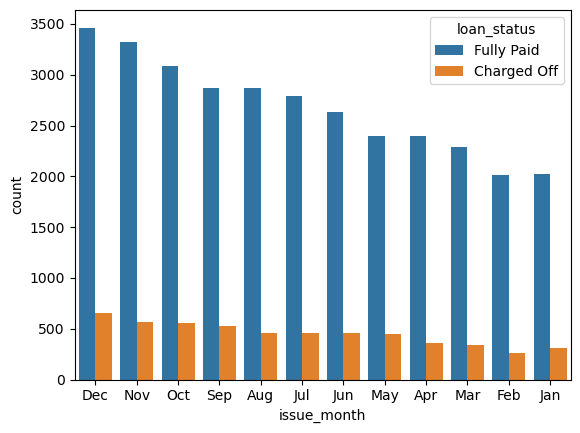

In [189]:
# issue_date, issue_year
sns.countplot(x='issue_year', data= loan_non_current)
plt.show()
sns.countplot(x='issue_month', data= loan_non_current)
plt.show()
sns.countplot(x='issue_month', data= loan_non_current, hue=loan_non_current.loan_status)
plt.show()

### Maximum loans were issued in the year 2011, December month being the month of the year when the largest number of loans are issued.

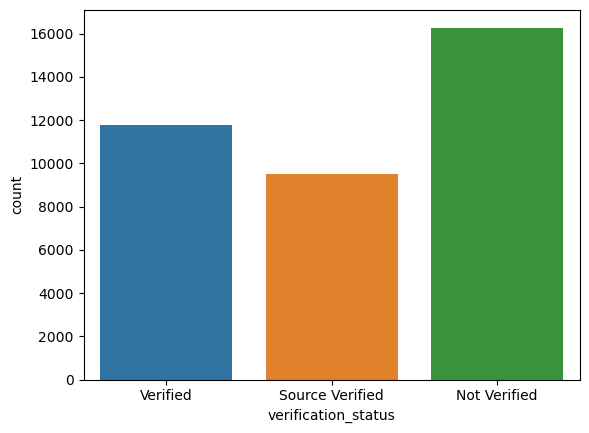

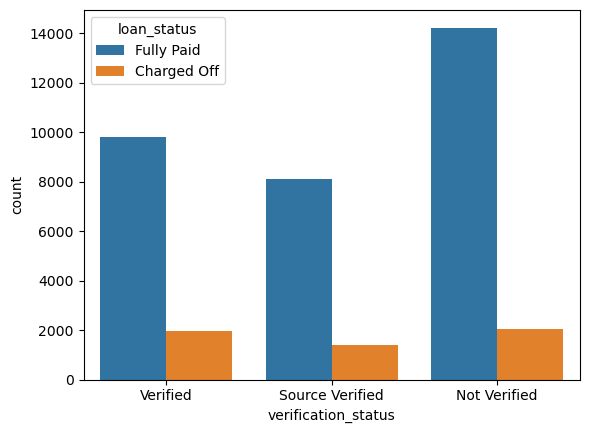

In [190]:
# verification_status
sns.countplot(x='verification_status', data= loan_non_current)
plt.show()
sns.countplot(x='verification_status', data= loan_non_current, hue=loan_non_current.loan_status)
plt.show()

### There can be 3 verification states: Verified, Source Verified and Not Verified
### Maximum loans issued are Not Verified

<Axes: xlabel='grade', ylabel='count'>

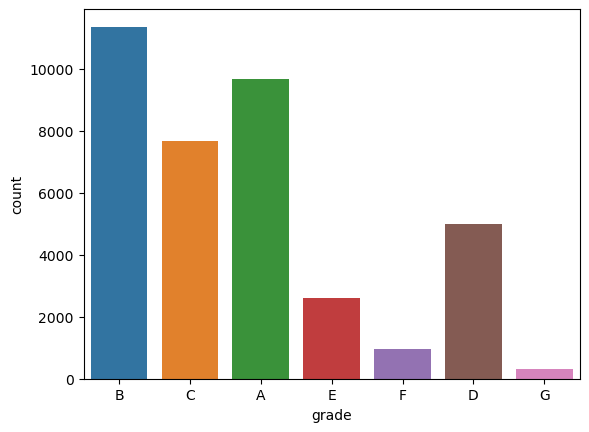

In [191]:
sns.countplot(x=loan_non_current.grade)

### There are 6 grades assigned by Lending Club to its borrowers. Maximum borrowers lie in the B category.

<Axes: xlabel='emp_length', ylabel='count'>

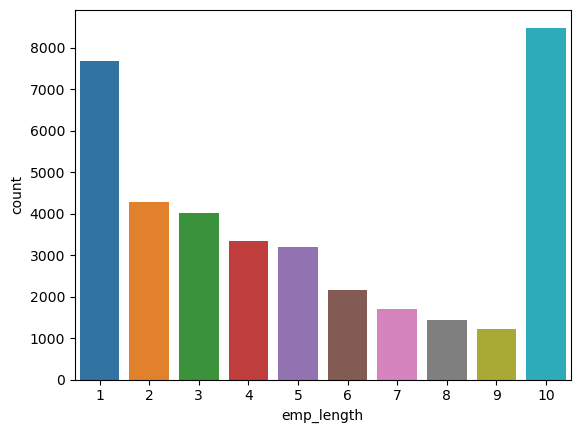

In [192]:
sns.countplot(x='emp_length', data=loan_non_current)

### Maximum loans are taken by employees who are fairly new to their org (1 year) or have been with the org for a long time (10 years or more)

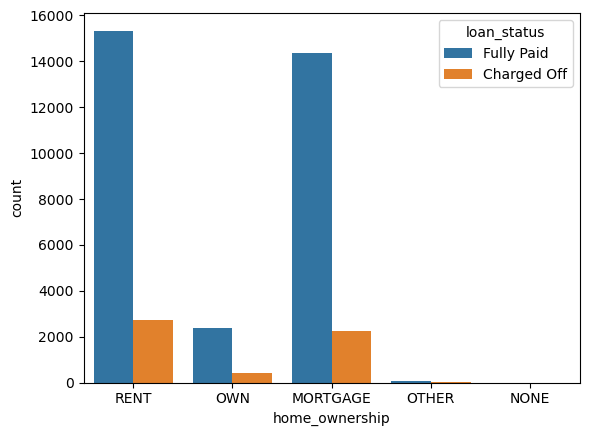

In [193]:
sns.countplot(x='home_ownership', data= loan_non_current, hue=loan_non_current.loan_status)
plt.show()

### Maximum loans are taken by people who are on Rent or who have their home Mortgaged. They are also likely to default more than people who own their home.

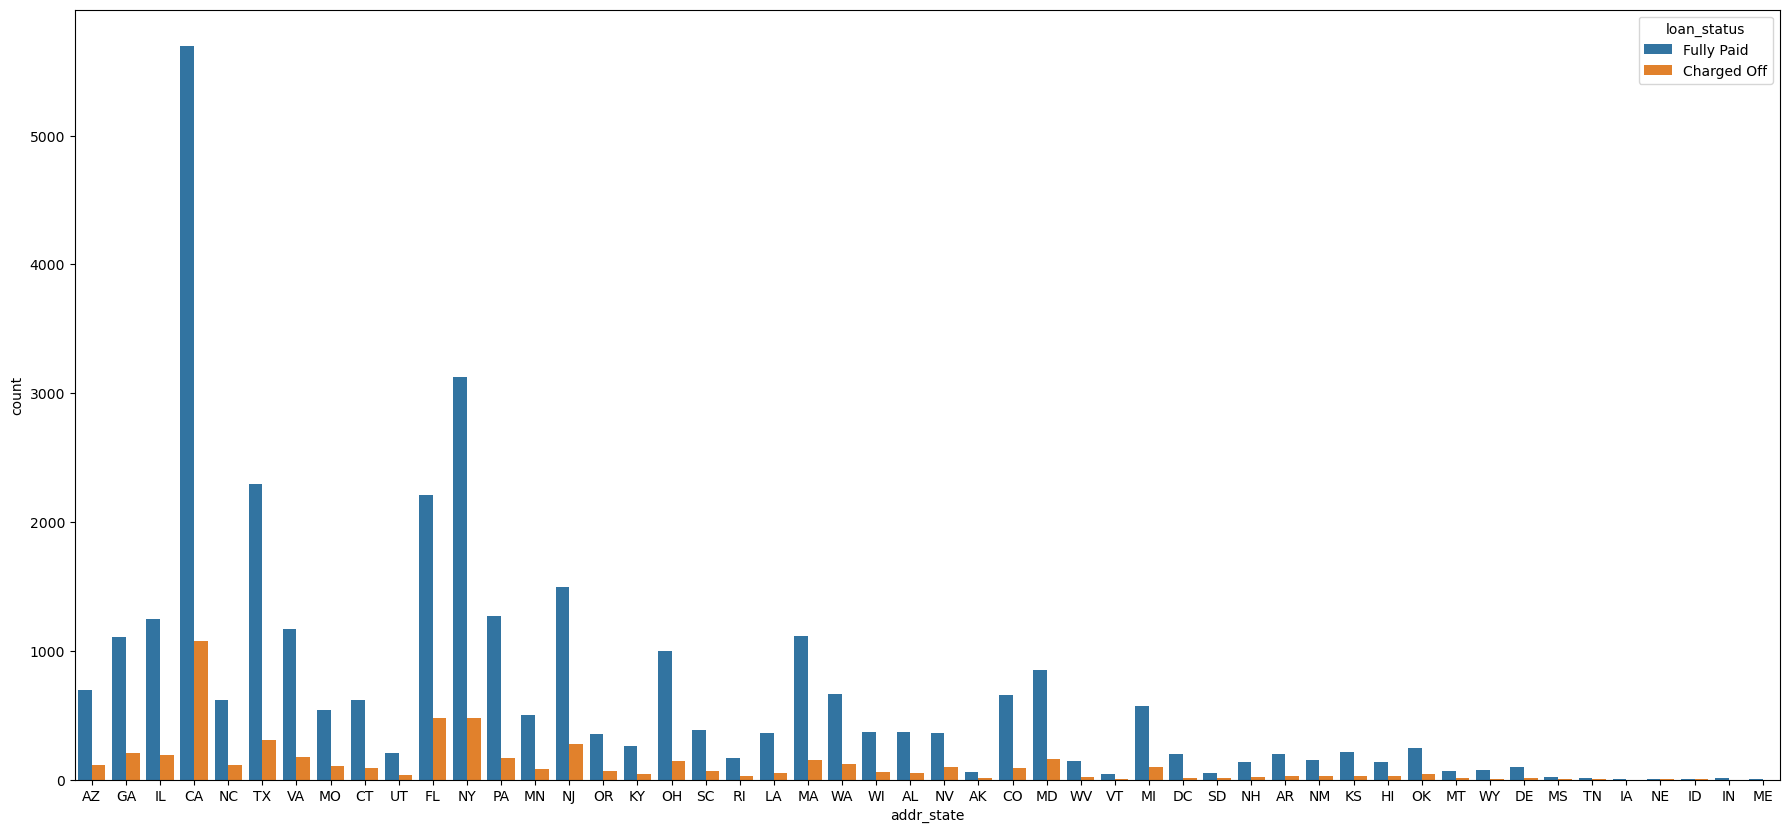

In [194]:
# addr_state
plt.figure(figsize=(22,10))
sns.countplot(x='addr_state', data= loan_non_current, hue=loan_non_current.loan_status)
plt.show()

### Maximum loans are issued to the state of California (CA), hence proportionally they have the largest number of defaulters.
### CA is the largest market for Lending Club to offer loans.

<Axes: xlabel='purpose', ylabel='count'>

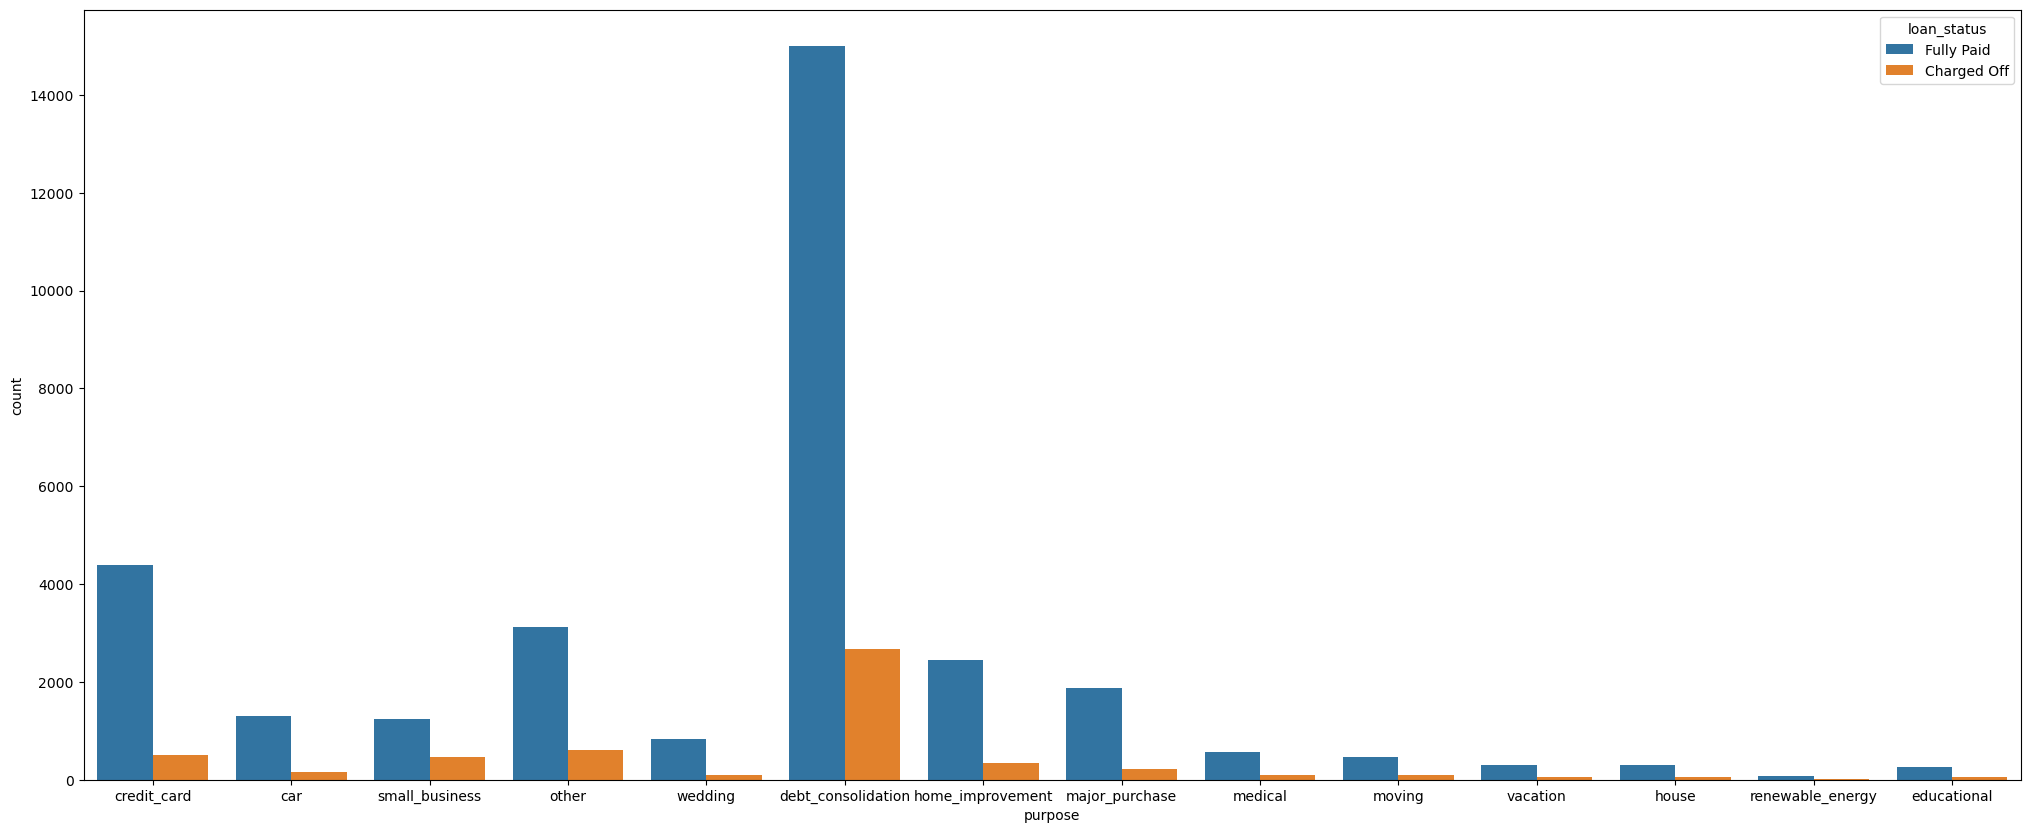

In [195]:
# purpose
plt.figure(figsize=(25,10))
sns.countplot(x='purpose', data= loan_non_current, hue=loan_non_current.loan_status)
#plt.show()

### The prevalent purpose for taking a home loan is for debt_consolidation, followed by credit card
### Maximum defaulters proportionally are the people who borrow for debt_consolidation


# A few combinations of different variables

<Axes: xlabel='grade', ylabel='int_rate'>

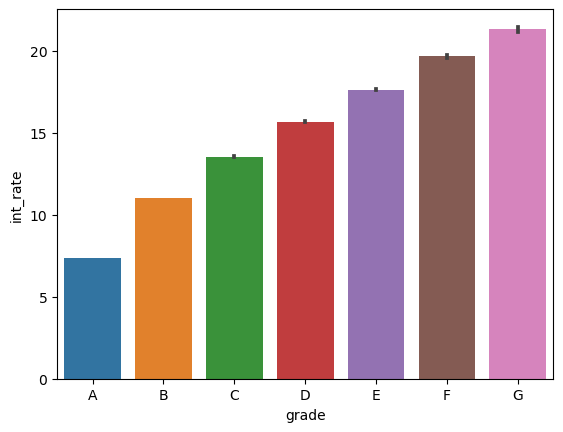

In [196]:
# int_rate and grade
category_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.barplot(x='grade', y='int_rate', data=loan_non_current, order=category_order)

### Lending Club issues loans with increasing interest rates from grade A to G, A being the lowest with around 7.5% to G being the highest with around 20%

<Axes: xlabel='grade', ylabel='annual_inc'>

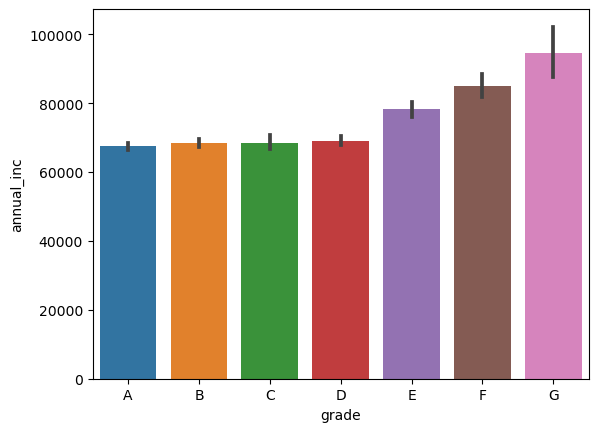

In [197]:
# int_rate and annual_inc

sns.barplot(x='grade', y='annual_inc', data=loan, order=category_order)

### The grades can be ranked from A to G with increasing annual income, A being the lowest annual income group to G being the highest.
### Loans given to the highest income groups are at a larger interest rate.

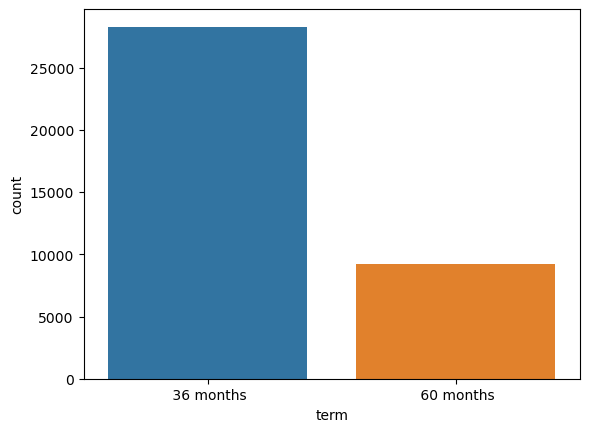

In [198]:
# term - which term 36 months or 60 months has more defaulters
# creating a new datfarme which has only the defaulters - loan_charged_off
loan_charged_off = loan[loan.loan_status.isin(['Charged Off'])]
sns.countplot(x='term', data= loan_non_current)
plt.show()


### Loans are offered for 2 term durations, 36 months and 60 months, 36 months being the prevalent term for maximum loans

<Axes: xlabel='grade', ylabel='count'>

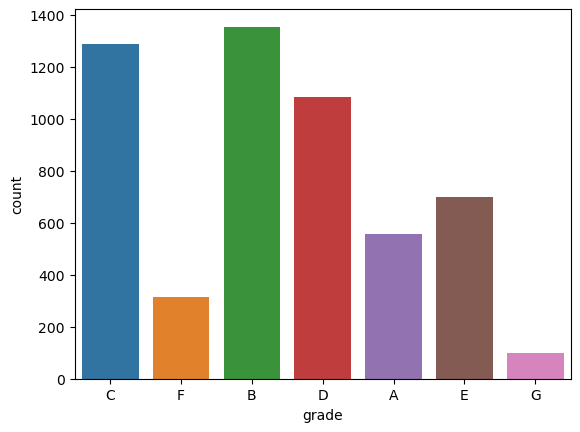

In [199]:
sns.countplot(x=loan_charged_off.grade)

### For the dataframe which contains only defaulters, the largest number of defaulters are in the B grade, closely followed by C grade

<Axes: xlabel='grade', ylabel='count'>

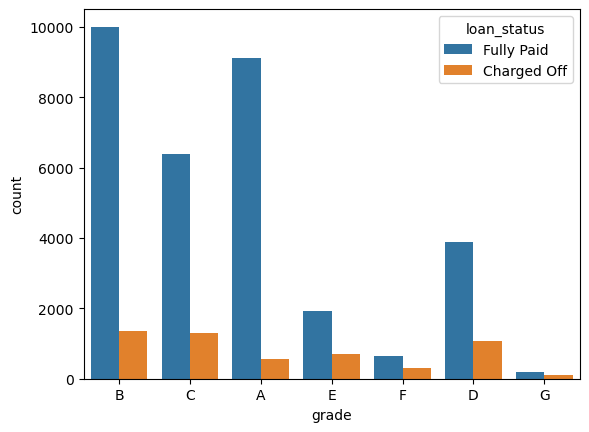

In [200]:
sns.countplot(x=loan_non_current.grade, hue=loan_non_current.loan_status)

### Maximum loans are taken by the B grade followed by A grade

<Axes: xlabel='emp_length', ylabel='count'>

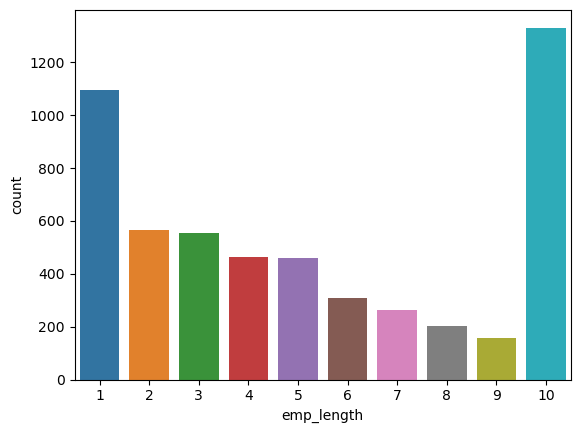

In [201]:
sns.countplot(x=loan_charged_off.emp_length)

### Among the defaulters, maximum are who have been with the org either for 10 years or more or are fairly new (1 year)

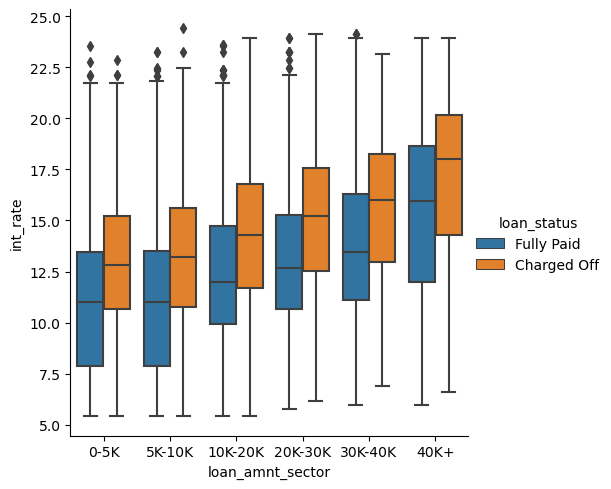

In [202]:
# int_rate and loan amount

sns.catplot(data=loan_non_current, x='loan_amnt_sector', y='int_rate', kind='box', hue='loan_status')
plt.show()


### As the loan amount increases, Lending Club issues loans with higher interest rates.
### Among these groups of loan amounts, the defaulting groups are the ones paying interest rates more than the average interest rates for their loan amount groups.

# Final Observations:
1. People who are new joiners or have been with the firm for long(>=10 years) are more likely to opt for loans and hence morelikely to default.
2. The higher income grade G has the highest interest rates to be paid on their loan amounts. They are also very risky as their loan amounts are high and they are proportionally likely to default more than the other grades. Since their loan amounts are large, they pose a bigger financial risk.
3. Rate of default increases as the interest rates increase
4. Short term loans (36 months) and high interest loans are more likely to default
5. California is the biggest market for Lending Club, and proportionally having maximum defaulters.
6. Borrowers who own a home are less likely to default as compared to those with rental or mortgaged properties.
7. Maximum loans are given during year ends, November, December, maximum without any verifications.

